In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [6]:
from src.unit import SiPMunit
from src.array import SiPMarray

### SiPM unit

In [9]:
mppc = SiPMunit(model = '3x3')
mppc.print_properties()

Model: S13370-3050, "3x3", by Hamamatsu
Total unit area: 42.47 mm^2
Active area: 9 mm^2
Active area fraction: 0.21
Width tolerance: 0.15 mm
Height tolerance: 0.15 mm


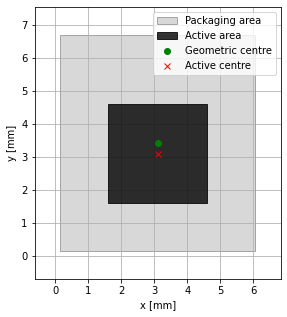

In [11]:
mppc.plot_model()

### SiPM array

In [14]:
array = SiPMarray(array_diameter=50, border_margin=0, sipm_model = '6x6')
array.print_properties()

Array diameter: 50 mm
Margin from the array edge: 0 mm
Number of units: 12
Total array area: 1963.50 mm^2
Total SiPM area: 1124.76 mm^2
Total SiPM active area: 432.00 mm^2


In [92]:
print('Number of SiPMs: ', array.n_sipms)

Number of SiPMs:  12


## Plot the array

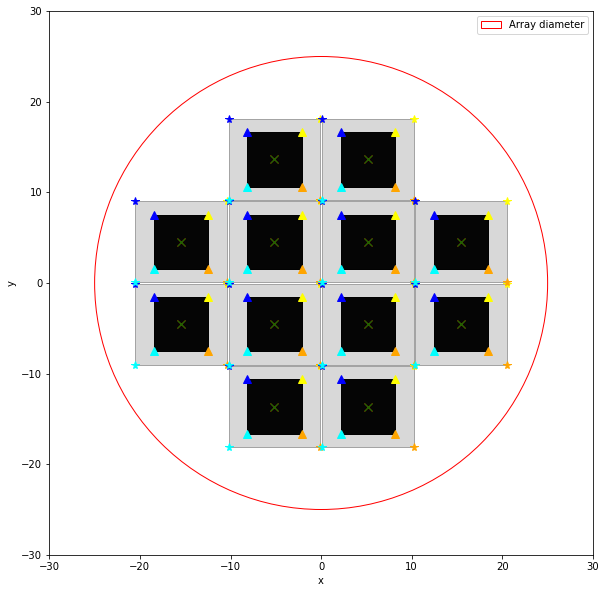

In [89]:
active_centres = array.get_centres()
geometric_centre = array.get_centres(active_area=False)

fig, ax = plt.subplots(1,1, figsize = (10,10))
fig, ax = array.plot_sipm_array(figax= (fig,ax))

corners_active = array.export_corners_active()
corners_package = array.export_corners_package()

for centre_i in range(array.n_sipms):
    _x_active = active_centres[0,centre_i]
    _y_active = active_centres[1,centre_i]
    ax.plot(_x_active, _y_active, 'x', color = 'red', markersize = 8)

    _x_geometric = geometric_centre[0,centre_i]
    _y_geometric = geometric_centre[1,centre_i]
    ax.plot(_x_geometric, _y_geometric, 'x', color = 'green', markersize = 8)

    _ax_corner = corners_active[0,centre_i]
    _ay_corner = corners_active[1,centre_i]
    _bx_corner = corners_active[2,centre_i]
    _by_corner = corners_active[3,centre_i]
    _cx_corner = corners_active[4,centre_i]
    _cy_corner = corners_active[5,centre_i]
    _dx_corner = corners_active[6,centre_i]
    _dy_corner = corners_active[7,centre_i]

    ax.plot(_ax_corner, _ay_corner, '^', color = 'blue', markersize = 8)
    ax.plot(_bx_corner, _by_corner, '^', color = 'yellow', markersize = 8)
    ax.plot(_cx_corner, _cy_corner, '^', color = 'orange', markersize = 8)
    ax.plot(_dx_corner, _dy_corner, '^', color = 'cyan', markersize = 8)

    _ax_corner = corners_package[0,centre_i]
    _ay_corner = corners_package[1,centre_i]
    _bx_corner = corners_package[2,centre_i]
    _by_corner = corners_package[3,centre_i]
    _cx_corner = corners_package[4,centre_i]
    _cy_corner = corners_package[5,centre_i]
    _dx_corner = corners_package[6,centre_i]
    _dy_corner = corners_package[7,centre_i]

    ax.plot(_ax_corner, _ay_corner, '*', color = 'blue', markersize = 8)
    ax.plot(_bx_corner, _by_corner, '*', color = 'yellow', markersize = 8)
    ax.plot(_cx_corner, _cy_corner, '*', color = 'orange', markersize = 8)
    ax.plot(_dx_corner, _dy_corner, '*', color = 'cyan', markersize = 8)


fig.savefig('test.pdf')
plt.show()

In [15]:
corners = array.export_corners_active(file_name='corners_active.csv')